In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import json
import re

dist_results_path = "../data/logs/dist_res.csv"
seq_par_results_path = "../data/logs/seq_par_res.csv"

# standard machine types
MASTER_MACHINE_TYPE = 'n1-standard-2' # dual core
WORKER_MACHINE_TYPE = 'n1-standard-4' # quad core

In [2]:
to_dict = lambda s: json.loads(re.sub(r'(\w+):', r'"\1":', s))

results = pd.concat([pd.read_csv(dist_results_path, sep=";"), pd.read_csv(seq_par_results_path, sep=";")], axis=0)

In [3]:
results = results.loc[:, ["Size", "Workers", "Result (JSON)", "Mode"]]

results = results[results["Result (JSON)"].notna()]

results["Mode"] = results["Mode"].fillna("dist")

In [4]:
results["Result (JSON)"] = results.apply(lambda row: to_dict(row["Result (JSON)"]), axis=1)

results

,Size,Workers,Result (JSON),Mode
0,1024,1.0,"{'trainTime': 80.39794886, 'testTime': 0.02254...",dist
1,1024,2.0,"{'trainTime': 91.735758818, 'testTime': 0.0184...",dist
2,1024,3.0,"{'trainTime': 113.031210898, 'testTime': 0.019...",dist
3,2048,1.0,"{'trainTime': 222.465692455, 'testTime': 0.019...",dist
4,2048,2.0,"{'trainTime': 231.318698904, 'testTime': 0.018...",dist
5,2048,3.0,"{'trainTime': 311.146347009, 'testTime': 0.045...",dist
6,4096,1.0,"{'trainTime': 361.221638682, 'testTime': 0.020...",dist
7,4096,2.0,"{'trainTime': 394.04598462, 'testTime': 0.0395...",dist
8,4096,3.0,"{'trainTime': 428.216268555, 'testTime': 0.022...",dist
9,8192,1.0,"{'trainTime': 651.468876513, 'testTime': 0.023...",dist


In [5]:
results = results.reset_index(drop=True)

In [7]:
for k in results["Result (JSON)"][0].keys():
    results[k] = results.apply(lambda row: row["Result (JSON)"][k], axis=1)

results.head(2)

,Size,Workers,Result (JSON),Mode,trainTime,testTime,score,unknown,unknownRelative
0,1024,1.0,"{'trainTime': 80.39794886, 'testTime': 0.02254...",dist,80.397949,0.022550,0.813725,34,0.166667
1,1024,2.0,"{'trainTime': 91.735758818, 'testTime': 0.0184...",dist,91.735759,0.018419,0.813725,34,0.166667


## Scalability performance

Performance on different numbers of nodes with specific sample

In [8]:
dist_results = results[results["Mode"] == "dist"]

dist_results

,Size,Workers,Result (JSON),Mode,trainTime,testTime,score,unknown,unknownRelative
0,1024,1.0,"{'trainTime': 80.39794886, 'testTime': 0.02254...",dist,80.397949,0.022550,0.813725,34,0.166667
1,1024,2.0,"{'trainTime': 91.735758818, 'testTime': 0.0184...",dist,91.735759,0.018419,0.813725,34,0.166667
2,1024,3.0,"{'trainTime': 113.031210898, 'testTime': 0.019...",dist,113.031211,0.019938,0.813725,34,0.166667
3,2048,1.0,"{'trainTime': 222.465692455, 'testTime': 0.019...",dist,222.465692,0.019818,0.753659,75,0.182927
4,2048,2.0,"{'trainTime': 231.318698904, 'testTime': 0.018...",dist,231.318699,0.018207,0.753659,75,0.182927
5,2048,3.0,"{'trainTime': 311.146347009, 'testTime': 0.045...",dist,311.146347,0.045490,0.753659,73,0.178049
6,4096,1.0,"{'trainTime': 361.221638682, 'testTime': 0.020...",dist,361.221639,0.020420,0.838828,77,0.094017
7,4096,2.0,"{'trainTime': 394.04598462, 'testTime': 0.0395...",dist,394.045985,0.039503,0.842491,76,0.092796
8,4096,3.0,"{'trainTime': 428.216268555, 'testTime': 0.022...",dist,428.216269,0.022943,0.843712,74,0.090354
9,8192,1.0,"{'trainTime': 651.468876513, 'testTime': 0.023...",dist,651.468877,0.023629,0.869033,125,0.076499


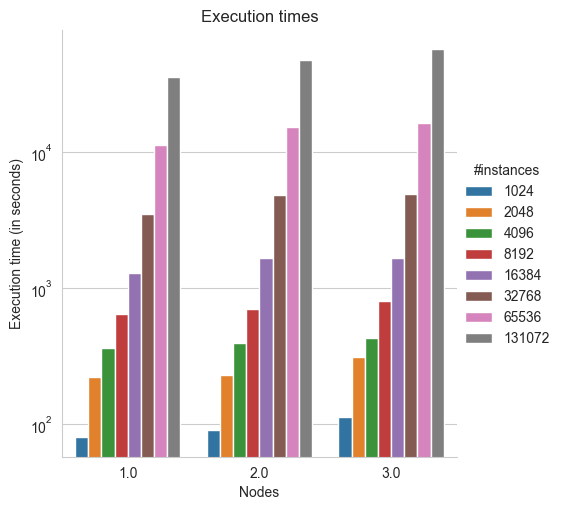

In [9]:
sns.set_style("whitegrid")

# bar plot no of nodes on x,exec time in seconds on y, legends num instances
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dist_results, kind="bar",
    x="Workers", y="trainTime", hue="Size",
    legend="full", palette="mute")

g.set(yscale="log")

plt.title("Execution times")

g.set_axis_labels("Nodes", "Execution time (in seconds)")
g.legend.set_title("#instances")

plt.show()

Performance for different sample size on different numbers of nodes

In [13]:
workers = [ int(worker) for worker in dist_results["Workers"].unique()]
workers.sort()

workers

[1, 2, 3]

In [18]:
dist_results

,Size,Workers,Result (JSON),Mode,trainTime,testTime,score,unknown,unknownRelative
0,1024,1.0,"{'trainTime': 80.39794886, 'testTime': 0.02254...",dist,80.397949,0.022550,0.813725,34,0.166667
1,1024,2.0,"{'trainTime': 91.735758818, 'testTime': 0.0184...",dist,91.735759,0.018419,0.813725,34,0.166667
2,1024,3.0,"{'trainTime': 113.031210898, 'testTime': 0.019...",dist,113.031211,0.019938,0.813725,34,0.166667
3,2048,1.0,"{'trainTime': 222.465692455, 'testTime': 0.019...",dist,222.465692,0.019818,0.753659,75,0.182927
4,2048,2.0,"{'trainTime': 231.318698904, 'testTime': 0.018...",dist,231.318699,0.018207,0.753659,75,0.182927
5,2048,3.0,"{'trainTime': 311.146347009, 'testTime': 0.045...",dist,311.146347,0.045490,0.753659,73,0.178049
6,4096,1.0,"{'trainTime': 361.221638682, 'testTime': 0.020...",dist,361.221639,0.020420,0.838828,77,0.094017
7,4096,2.0,"{'trainTime': 394.04598462, 'testTime': 0.0395...",dist,394.045985,0.039503,0.842491,76,0.092796
8,4096,3.0,"{'trainTime': 428.216268555, 'testTime': 0.022...",dist,428.216269,0.022943,0.843712,74,0.090354
9,8192,1.0,"{'trainTime': 651.468876513, 'testTime': 0.023...",dist,651.468877,0.023629,0.869033,125,0.076499


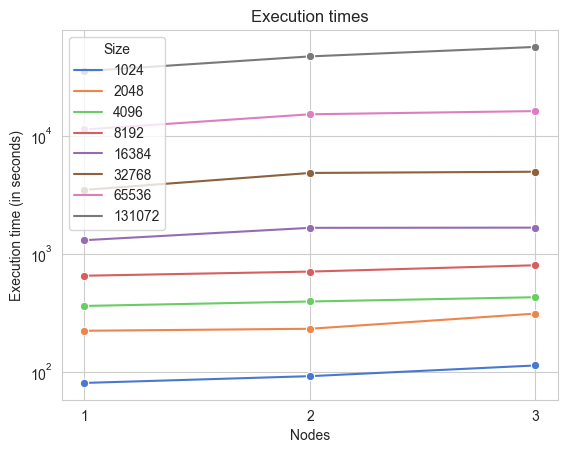

In [30]:
# bar plot no of nodes on x,exec time in seconds on y, legends num instances
# Draw a nested barplot by species and sex

g = sns.lineplot(
    data=dist_results,
    x="Workers", y="trainTime", hue="Size",
    legend="full",
    palette= "muted",
    marker="o"
    )

g.set(yscale="log")

g.set_xticks(range(1, len(workers) +1)) # <--- set the ticks first

plt.title("Execution times")

g.set_ylabel("Execution time (in seconds)")
g.set_xlabel("Nodes")

plt.show()